# Imports

In [1]:
import torch
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from torchvision.datasets import MNIST

## Parameters

In [2]:
# Params
mb_size = 64
Z_dim = 100
X_dim = 784
y_dim = 10
h_dim = 500
cnt = 0
lr = 0.0002

## Datasets and Dataloaders

In [3]:
# Utils

# THIS DOES NOT WORK CAUSE COMPOSE PASSES SINGLE ARGUMENT TO CALL
# class ToOneHot(object):
#     """Convert labels to one hot encoded vectors
#     """
#     def __init__(self, n_dim=10):
#         self.n_dim = n_dim
    
#     def __call__(self, img, target):
#         one_hot = torch.zeros(self.n_dim)
#         one_hot[target] = 1
#         target = one_hot
#         return img, target

def toOneHot(target, n_dim=10):
    """ Convert labels to one hot encoded vectors
    """
    one_hot = torch.zeros(target.size()[0], n_dim).scatter_(1, target.unsqueeze(1), 1)
    return one_hot
    
    
class Flatten(object):
    """ Convert labels to one hot encoded vectors
    """   
    def __call__(self, img):
        img = img.view(-1)
        return img

In [4]:
# Datasets
train_dataset = MNIST(
    './data', 
    train=True, 
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
        Flatten(),
    ])
)

test_dataset = MNIST(
    './data',
    train=False, 
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

In [5]:
# Loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=mb_size, 
    shuffle=True, 
    num_workers=4
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, 
    batch_size=test_dataset.test_labels.size()[0], 
    shuffle=True, 
    num_workers=4
)

In [6]:
# demo sampling 
img, target = next(iter(train_loader))

In [7]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return Variable(torch.randn(*size) * xavier_stddev, requires_grad=True)

In [12]:
""" ==================== GENERATOR ======================== """

Wzh = xavier_init(size=[Z_dim + y_dim, h_dim])
bzh = Variable(torch.zeros(h_dim), requires_grad=True)

Whx = xavier_init(size=[h_dim, X_dim])
bhx = Variable(torch.zeros(X_dim), requires_grad=True)


def G(z, c):
    inputs = torch.cat([z, c], 1)
    h = nn.relu(inputs @ Wzh + bzh.repeat(inputs.size(0), 1))
    X = nn.tanh(h @ Whx + bhx.repeat(h.size(0), 1))
    return X

In [13]:
""" ==================== DISCRIMINATOR ======================== """

Wxh = xavier_init(size=[X_dim + y_dim, h_dim])
bxh = Variable(torch.zeros(h_dim), requires_grad=True)

Why = xavier_init(size=[h_dim, 1])
bhy = Variable(torch.zeros(1), requires_grad=True)


def D(X, c):
    inputs = torch.cat([X, c], 1)
    h = nn.leaky_relu(inputs @ Wxh + bxh.repeat(inputs.size(0), 1), negative_slope=0.2)
    y = nn.sigmoid(h @ Why + bhy.repeat(h.size(0), 1))
    return y

In [14]:
G_params = [Wzh, bzh, Whx, bhx]
D_params = [Wxh, bxh, Why, bhy]
params = G_params + D_params

In [15]:
def reset_grad():
    for p in params:
        if p.grad is not None:
            data = p.grad.data
            p.grad = Variable(data.new().resize_as_(data).zero_())

G_solver = optim.Adam(G_params, lr=0.0002)
D_solver = optim.SGD(D_params, lr=0.0002, momentum=0.9)

Iter-0; D_loss: 1.5470330715179443; G_loss: 0.9401688575744629


/home/fayyaz/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/fayyaz/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


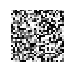

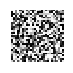

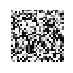

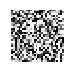

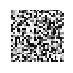

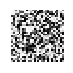

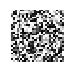

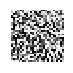

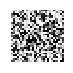

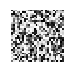

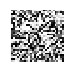

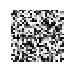

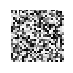

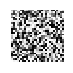

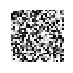

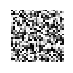

Stop 1
Iter-1000; D_loss: 2.1902365684509277; G_loss: 0.723227322101593


<Figure size 432x288 with 0 Axes>

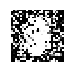

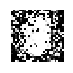

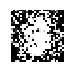

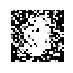

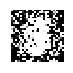

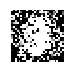

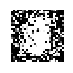

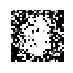

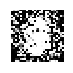

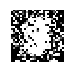

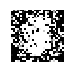

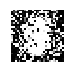

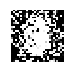

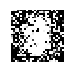

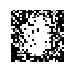

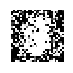

Stop 1
Iter-2000; D_loss: 1.0920777320861816; G_loss: 1.2034964561462402


<Figure size 432x288 with 0 Axes>

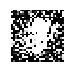

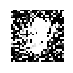

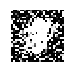

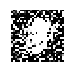

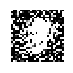

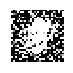

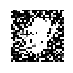

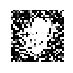

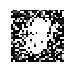

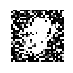

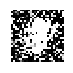

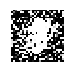

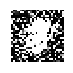

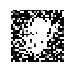

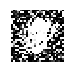

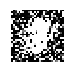

Stop 1
Iter-3000; D_loss: 0.9066684246063232; G_loss: 1.4699832201004028


<Figure size 432x288 with 0 Axes>

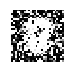

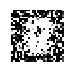

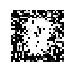

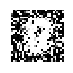

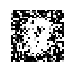

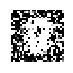

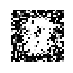

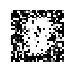

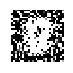

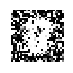

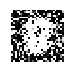

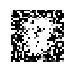

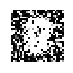

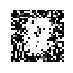

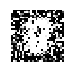

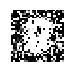

Stop 1
Iter-4000; D_loss: 0.6823134422302246; G_loss: 1.7301397323608398


<Figure size 432x288 with 0 Axes>

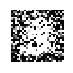

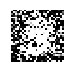

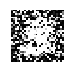

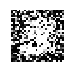

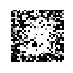

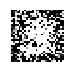

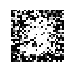

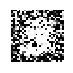

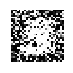

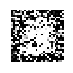

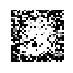

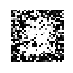

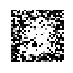

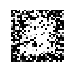

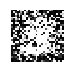

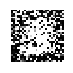

Stop 1
Iter-5000; D_loss: 0.8115443587303162; G_loss: 1.8367387056350708


<Figure size 432x288 with 0 Axes>

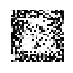

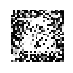

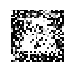

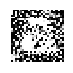

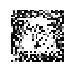

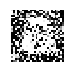

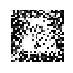

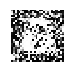

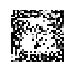

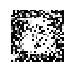

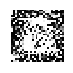

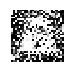

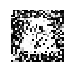

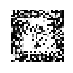

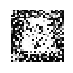

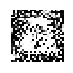

Stop 1
Iter-6000; D_loss: 0.4279620051383972; G_loss: 1.7741416692733765


<Figure size 432x288 with 0 Axes>

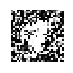

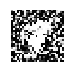

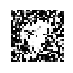

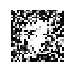

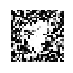

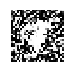

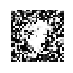

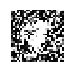

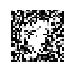

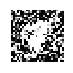

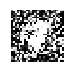

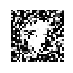

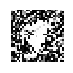

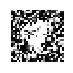

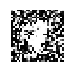

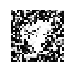

Stop 1
Iter-7000; D_loss: 1.3709754943847656; G_loss: 1.1251368522644043


<Figure size 432x288 with 0 Axes>

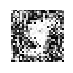

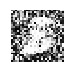

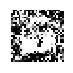

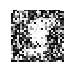

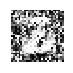

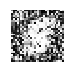

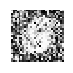

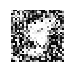

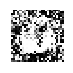

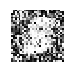

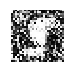

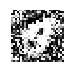

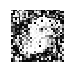

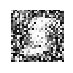

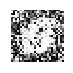

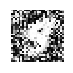

Stop 1
Iter-8000; D_loss: 1.3888731002807617; G_loss: 0.6759886145591736


<Figure size 432x288 with 0 Axes>

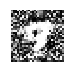

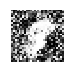

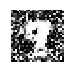

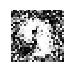

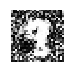

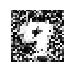

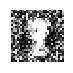

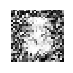

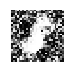

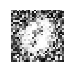

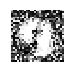

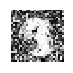

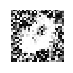

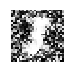

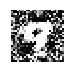

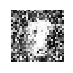

Stop 1
Iter-9000; D_loss: 1.3327291011810303; G_loss: 0.7692445516586304


<Figure size 432x288 with 0 Axes>

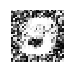

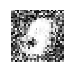

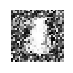

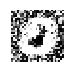

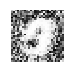

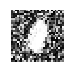

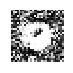

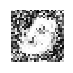

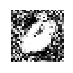

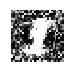

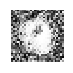

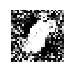

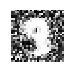

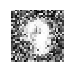

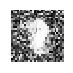

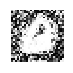

Stop 1
Iter-10000; D_loss: 1.2290184497833252; G_loss: 0.7087863683700562


<Figure size 432x288 with 0 Axes>

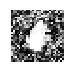

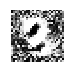

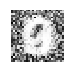

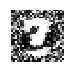

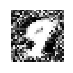

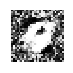

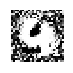

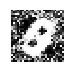

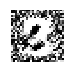

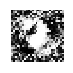

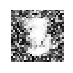

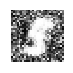

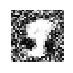

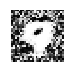

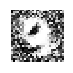

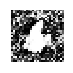

Stop 1
Iter-11000; D_loss: 1.1091362237930298; G_loss: 0.7288308143615723


<Figure size 432x288 with 0 Axes>

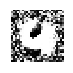

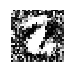

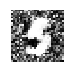

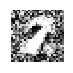

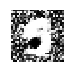

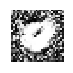

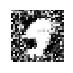

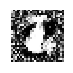

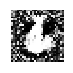

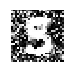

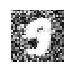

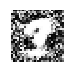

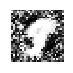

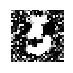

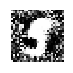

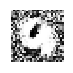

Stop 1
Iter-12000; D_loss: 1.1244666576385498; G_loss: 0.785087525844574


<Figure size 432x288 with 0 Axes>

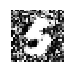

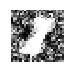

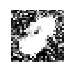

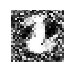

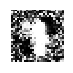

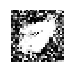

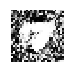

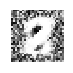

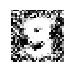

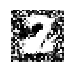

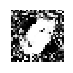

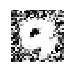

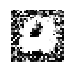

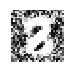

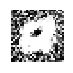

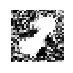

Stop 1
Iter-13000; D_loss: 1.1507277488708496; G_loss: 0.8603084087371826


<Figure size 432x288 with 0 Axes>

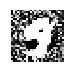

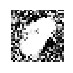

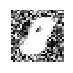

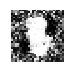

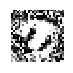

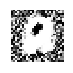

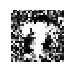

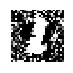

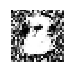

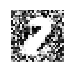

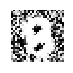

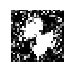

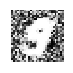

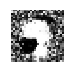

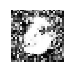

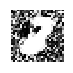

Stop 1
Iter-14000; D_loss: 1.1332731246948242; G_loss: 0.8702161312103271


<Figure size 432x288 with 0 Axes>

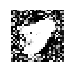

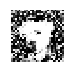

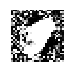

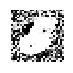

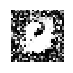

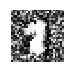

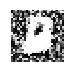

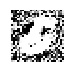

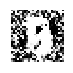

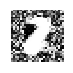

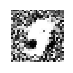

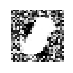

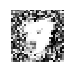

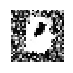

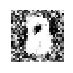

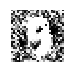

Stop 1
Iter-15000; D_loss: 1.0967347621917725; G_loss: 0.9053921103477478


<Figure size 432x288 with 0 Axes>

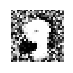

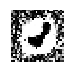

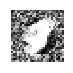

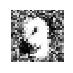

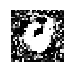

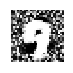

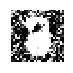

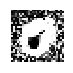

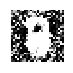

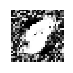

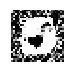

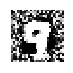

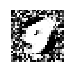

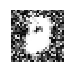

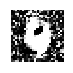

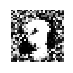

Stop 1
Stop 1
Iter-16000; D_loss: 1.0031260251998901; G_loss: 0.8764609098434448


<Figure size 432x288 with 0 Axes>

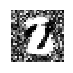

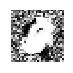

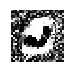

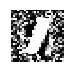

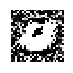

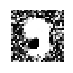

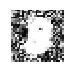

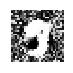

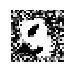

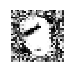

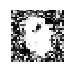

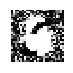

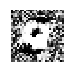

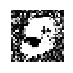

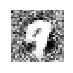

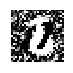

Stop 1
Iter-17000; D_loss: 0.9286594390869141; G_loss: 0.9350678324699402


<Figure size 432x288 with 0 Axes>

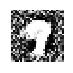

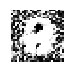

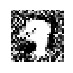

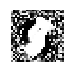

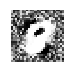

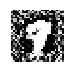

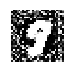

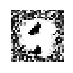

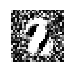

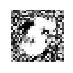

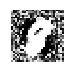

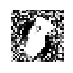

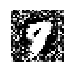

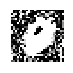

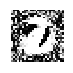

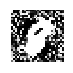

Stop 1
Iter-18000; D_loss: 0.9217715263366699; G_loss: 0.9338988661766052


<Figure size 432x288 with 0 Axes>

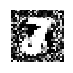

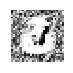

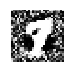

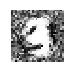

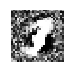

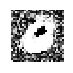

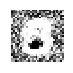

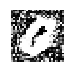

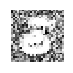

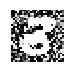

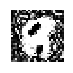

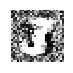

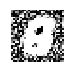

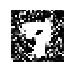

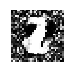

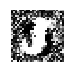

Stop 1
Iter-19000; D_loss: 0.8859015703201294; G_loss: 0.9716181755065918


<Figure size 432x288 with 0 Axes>

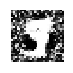

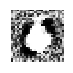

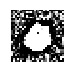

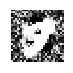

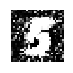

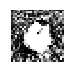

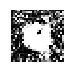

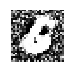

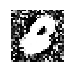

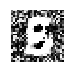

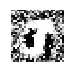

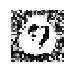

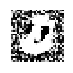

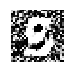

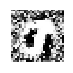

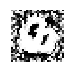

Stop 1
Iter-20000; D_loss: 0.9033910632133484; G_loss: 1.0299713611602783


<Figure size 432x288 with 0 Axes>

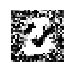

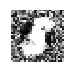

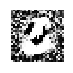

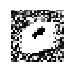

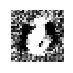

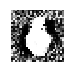

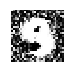

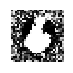

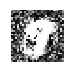

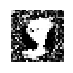

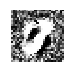

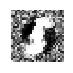

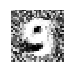

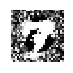

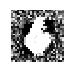

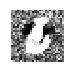

Stop 1
Iter-21000; D_loss: 0.9143673777580261; G_loss: 1.0340603590011597


<Figure size 432x288 with 0 Axes>

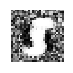

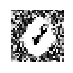

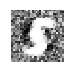

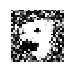

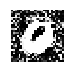

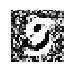

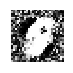

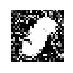

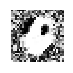

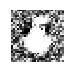

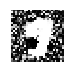

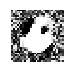

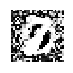

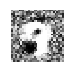

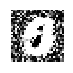

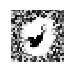

Stop 1
Iter-22000; D_loss: 0.9821308851242065; G_loss: 1.1175240278244019


<Figure size 432x288 with 0 Axes>

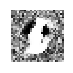

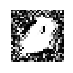

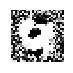

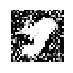

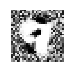

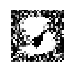

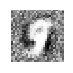

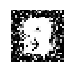

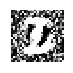

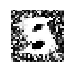

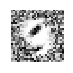

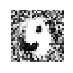

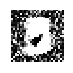

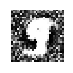

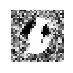

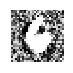

Stop 1
Iter-23000; D_loss: 0.7409257888793945; G_loss: 1.0892977714538574


<Figure size 432x288 with 0 Axes>

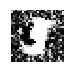

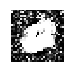

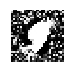

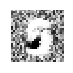

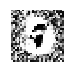

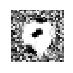

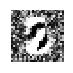

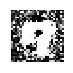

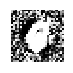

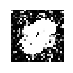

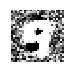

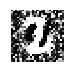

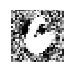

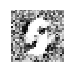

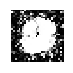

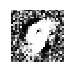

Stop 1
Iter-24000; D_loss: 0.7667940855026245; G_loss: 1.1579043865203857


<Figure size 432x288 with 0 Axes>

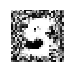

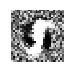

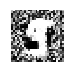

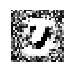

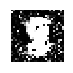

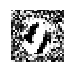

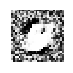

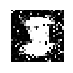

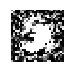

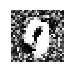

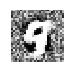

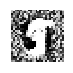

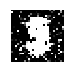

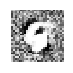

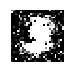

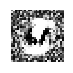

Stop 1
Iter-25000; D_loss: 0.781429648399353; G_loss: 1.2576936483383179


<Figure size 432x288 with 0 Axes>

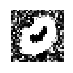

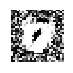

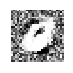

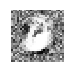

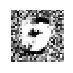

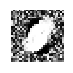

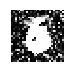

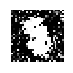

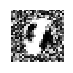

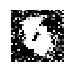

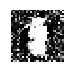

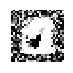

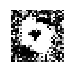

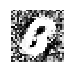

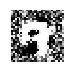

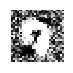

Stop 1
Iter-26000; D_loss: 0.7160708904266357; G_loss: 1.2379631996154785


<Figure size 432x288 with 0 Axes>

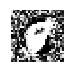

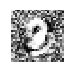

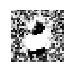

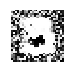

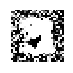

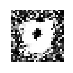

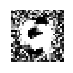

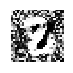

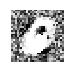

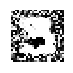

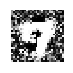

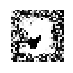

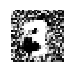

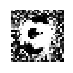

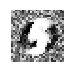

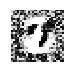

Stop 1
Iter-27000; D_loss: 0.6078609228134155; G_loss: 1.290708065032959


<Figure size 432x288 with 0 Axes>

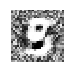

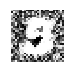

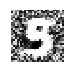

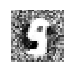

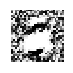

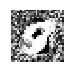

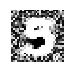

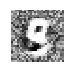

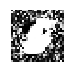

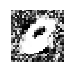

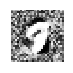

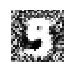

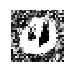

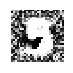

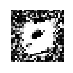

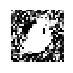

Stop 1
Iter-28000; D_loss: 0.7393401861190796; G_loss: 1.2659341096878052


<Figure size 432x288 with 0 Axes>

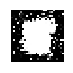

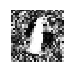

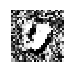

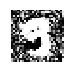

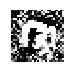

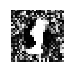

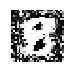

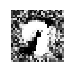

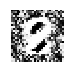

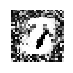

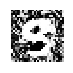

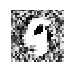

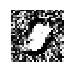

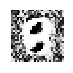

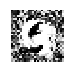

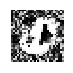

Stop 1
Iter-29000; D_loss: 0.7013356685638428; G_loss: 1.270969033241272


<Figure size 432x288 with 0 Axes>

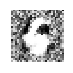

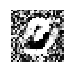

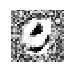

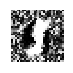

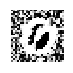

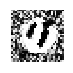

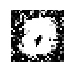

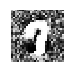

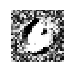

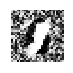

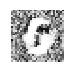

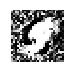

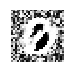

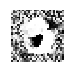

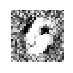

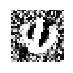

Stop 1
Iter-30000; D_loss: 0.708922266960144; G_loss: 1.394619107246399


<Figure size 432x288 with 0 Axes>

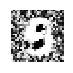

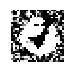

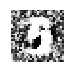

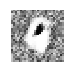

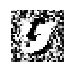

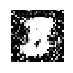

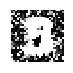

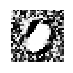

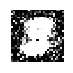

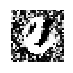

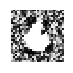

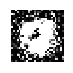

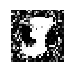

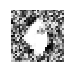

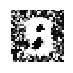

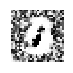

Stop 1
Stop 1
Iter-31000; D_loss: 0.5866614580154419; G_loss: 1.4281944036483765


<Figure size 432x288 with 0 Axes>

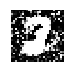

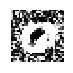

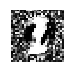

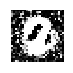

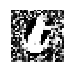

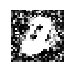

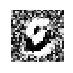

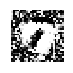

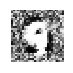

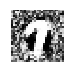

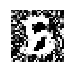

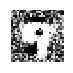

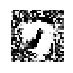

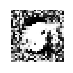

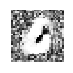

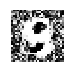

Stop 1
Iter-32000; D_loss: 0.7205846309661865; G_loss: 1.378407597541809


<Figure size 432x288 with 0 Axes>

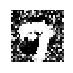

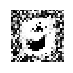

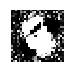

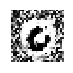

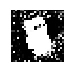

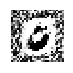

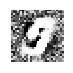

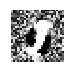

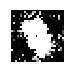

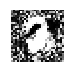

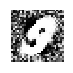

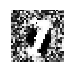

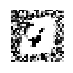

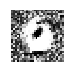

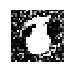

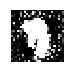

Stop 1
Iter-33000; D_loss: 0.7497483491897583; G_loss: 1.384106159210205


<Figure size 432x288 with 0 Axes>

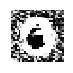

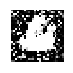

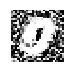

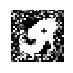

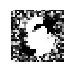

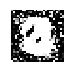

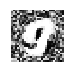

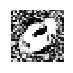

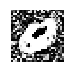

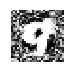

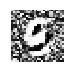

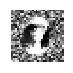

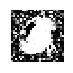

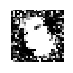

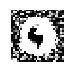

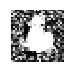

Stop 1
Iter-34000; D_loss: 0.523758590221405; G_loss: 1.364332675933838


<Figure size 432x288 with 0 Axes>

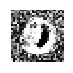

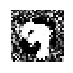

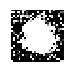

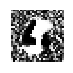

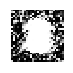

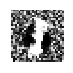

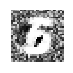

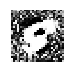

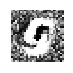

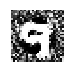

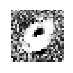

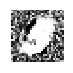

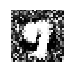

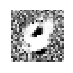

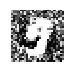

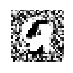

Stop 1
Iter-35000; D_loss: 0.5487031936645508; G_loss: 1.5259109735488892


<Figure size 432x288 with 0 Axes>

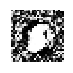

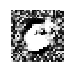

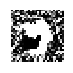

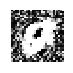

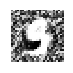

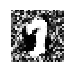

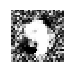

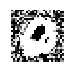

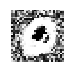

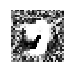

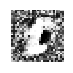

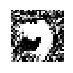

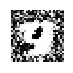

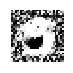

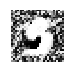

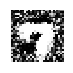

Stop 1
Iter-36000; D_loss: 0.7019233703613281; G_loss: 1.5441699028015137


<Figure size 432x288 with 0 Axes>

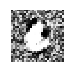

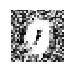

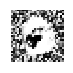

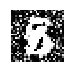

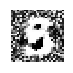

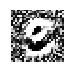

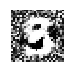

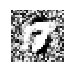

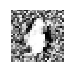

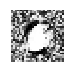

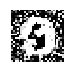

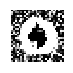

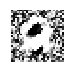

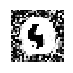

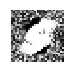

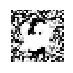

Stop 1
Iter-37000; D_loss: 0.6475208401679993; G_loss: 1.6098132133483887


<Figure size 432x288 with 0 Axes>

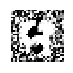

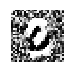

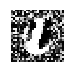

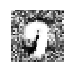

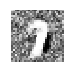

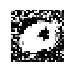

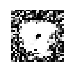

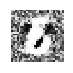

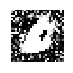

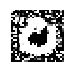

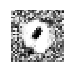

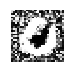

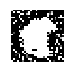

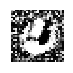

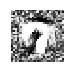

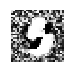

Stop 1
Iter-38000; D_loss: 0.602064847946167; G_loss: 1.6366549730300903


<Figure size 432x288 with 0 Axes>

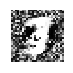

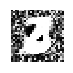

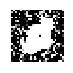

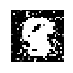

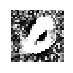

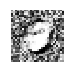

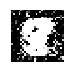

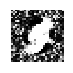

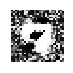

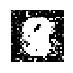

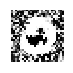

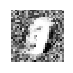

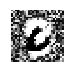

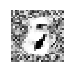

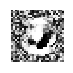

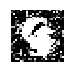

Stop 1
Iter-39000; D_loss: 0.43265700340270996; G_loss: 1.6728150844573975


<Figure size 432x288 with 0 Axes>

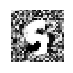

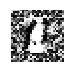

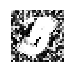

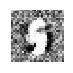

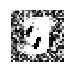

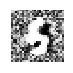

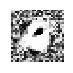

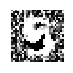

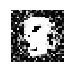

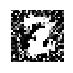

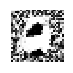

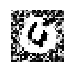

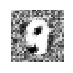

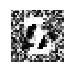

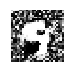

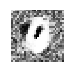

Stop 1
Iter-40000; D_loss: 0.45610445737838745; G_loss: 1.66571044921875


<Figure size 432x288 with 0 Axes>

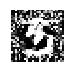

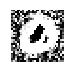

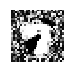

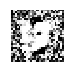

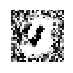

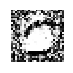

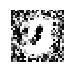

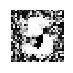

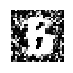

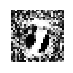

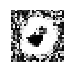

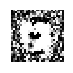

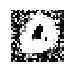

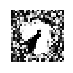

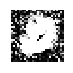

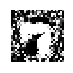

Stop 1
Iter-41000; D_loss: 0.5268670916557312; G_loss: 1.73099684715271


<Figure size 432x288 with 0 Axes>

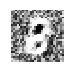

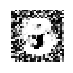

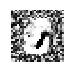

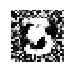

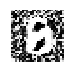

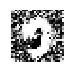

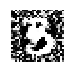

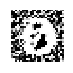

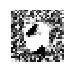

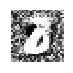

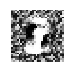

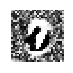

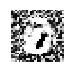

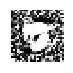

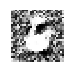

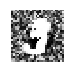

Stop 1
Iter-42000; D_loss: 0.42820119857788086; G_loss: 1.7147951126098633


<Figure size 432x288 with 0 Axes>

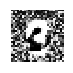

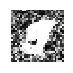

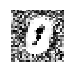

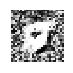

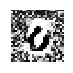

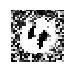

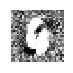

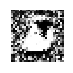

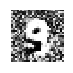

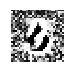

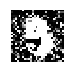

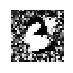

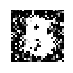

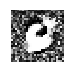

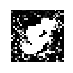

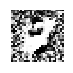

Stop 1
Iter-43000; D_loss: 0.4604552388191223; G_loss: 1.7067992687225342


<Figure size 432x288 with 0 Axes>

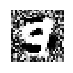

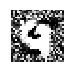

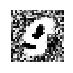

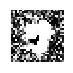

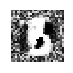

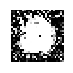

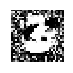

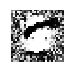

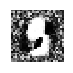

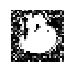

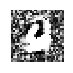

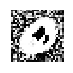

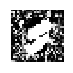

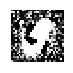

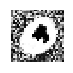

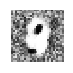

Stop 1
Iter-44000; D_loss: 0.5018765330314636; G_loss: 1.854849100112915


<Figure size 432x288 with 0 Axes>

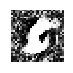

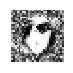

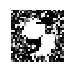

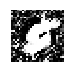

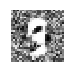

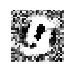

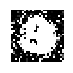

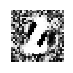

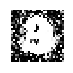

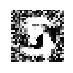

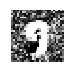

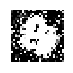

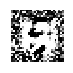

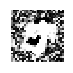

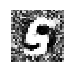

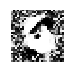

Stop 1


In [ ]:
train_iter = iter(train_loader)

""" ===================== TRAINING ======================== """
for it in range(100000):
    try:
        # Sample data
        X, c = next(train_iter)
        X = Variable(X)
        c = Variable(toOneHot(c))
        
        # batch_size might be less than 64 when samples are exhausted
        mb_size_actual = c.size()[0] # X.size()[0] should be same
        
        z = Variable(torch.randn(mb_size_actual, Z_dim))
        
        # Dicriminator forward-loss-backward-update
        G_sample = G(z, c)
        D_real = D(X, c)
        D_fake = D(G_sample, c)
        
        ones_label = Variable(torch.ones(mb_size_actual, 1))
        zeros_label = Variable(torch.zeros(mb_size_actual, 1))

        D_loss_real = nn.binary_cross_entropy(D_real, ones_label)
        D_loss_fake = nn.binary_cross_entropy(D_fake, zeros_label)
        D_loss = D_loss_real + D_loss_fake

        D_loss.backward()
        D_solver.step()

        # Housekeeping - reset gradient
        reset_grad()

        # Generator forward-loss-backward-update
        z = Variable(torch.randn(mb_size_actual, Z_dim))
        G_sample = G(z, c)
        D_fake = D(G_sample, c)

        G_loss = nn.binary_cross_entropy(D_fake, ones_label)

        G_loss.backward()
        G_solver.step()

        # Housekeeping - reset gradient
        reset_grad()

        # Print and plot every now and then
        if it % 1000 == 0:
            print('Iter-{}; D_loss: {}; G_loss: {}'.format(it, D_loss.data.numpy(), G_loss.data.numpy()))

            c = np.zeros(shape=[mb_size_actual, y_dim], dtype='float32')
            c[:, np.random.randint(0, 10)] = 1.
            c = Variable(torch.from_numpy(c))
            samples = G(z, c).data.numpy()[:16]

            fig = plt.figure(figsize=(4, 4))
            gs = gridspec.GridSpec(4, 4)
            gs.update(wspace=0.05, hspace=0.05)

            for i, sample in enumerate(samples):
                ax = plt.subplot(gs[i])
                plt.axis('off')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_aspect('equal')
                plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
                plt.pause(0.5)

            if not os.path.exists('out/'):
                os.makedirs('out/')

            plt.savefig('out/{}.png'.format(str(cnt).zfill(3)), bbox_inches='tight')
            cnt += 1
            plt.close(fig)
    except StopIteration:
        train_iter = iter(train_loader)
        print('Stop 1')

In [ ]:
z = Variable(torch.randn(1, Z_dim))
label = 2
one_hot_label = torch.zeros(1, 10)
one_hot_label[0][label] = 1
c = Variable(one_hot_label)

In [ ]:
G_sample = G(z, c)

In [ ]:
G_sample.size()

In [ ]:
plt.imshow(G_sample.view(28, 28).detach().cpu().numpy())

In [ ]:
np_image = G_sample.view(28, 28).detach().cpu().numpy()

In [ ]:
plt.hist(np_image)

In [ ]:
img, target = next(iter(train_loader))